Theodore 

The purpose of this notebook is to analyze the data stored in the .npz file.

### Load the data 

In [2]:
## ------------------------ IMPORT LIB ------------------------ ##

import numpy as np
import matplotlib.pyplot as plt
from DataSet import DataSet
from PostProcessor import PostProcessor
from scipy.stats import linregress

In [17]:
## ------------------------ DEFINE COUNSTANTS AND VARIABLES ------------------------ ##

# AF = 'EI'

In [18]:
pp1 = PostProcessor('results/gpbo_custom_FixedOnlineGP_UCB_first_GPBO_validResponses_customFOGP_kappa8.npz')
pp1.load_data(load_durations=True)
pp2 = PostProcessor('results/gpbo_custom_FixedOnlineGP_UCB_first_GPBO_validResponses_customFOGP_kappa50.npz')
pp2.load_data(load_durations=True)
pp3 = PostProcessor('results/gpbo_custom_FixedOnlineGP_UCB_first_GPBO_validResponses_customFOGP_kappa200.npz')
pp3.load_data(load_durations=True)
pp4 = PostProcessor('results/gpbo_custom_FixedOnlineGP_UCB_first_GPBO_validResponses_customFOGP_kappa1000.npz')
pp4.load_data(load_durations=True)
pp5 = PostProcessor('results/gpbo_custom_FixedGP_UCB_first_GPBO_validResponses_customFGP.npz')
pp5.load_data(load_durations=True)
pp6 = PostProcessor('results/gpbo_custom_FixedOnlineGP_UCB_first_GPBO_validResponses_customFOGP.npz')
pp6.load_data(load_durations=True)
pp7 = PostProcessor('results/gpbo_custom_FixedOnlineGP_without_schur_UCB_first_GPBO_validResponses_customFOGPcholesky_kappa1000.npz')
pp7.load_data(load_durations=True)

print(pp2.data.files)

['P_test_x', 'P_test_x_idx', 'P_test_y', 'best_pred_x', 'best_pred_x_measured', 'rand_idx', 'elapsed_time', 'P_mean_pred', 'P_std_pred', 'iter_durations', 'gp_durations', 'state_of_the_simu', 'emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy']


In [15]:
pp = PostProcessor('results/gpbo_gpytorch_UCB_cebus1_test_hyp_valid.npz')
pp.load_data(load_hyperparams=True)

pp1 = PostProcessor('results/gpbo_gpytorch_EI_cebus1_test_hyp_valid.npz')
pp1.load_data(load_hyperparams=True)

print(pp.data.files)
print(pp1.data.files)

['P_test_x', 'P_test_x_idx', 'P_test_y', 'best_pred_x', 'best_pred_x_measured', 'rand_idx', 'elapsed_time', 'iter_durations', 'gp_durations', 'hyp_opti_durations', 'mean_calc_durations', 'std_calc_durations', 'lengthscale', 'outputscale', 'noise', 'state_of_the_simu', 'emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy']
['P_test_x', 'P_test_x_idx', 'P_test_y', 'best_pred_x', 'best_pred_x_measured', 'rand_idx', 'elapsed_time', 'iter_durations', 'gp_durations', 'hyp_opti_durations', 'mean_calc_durations', 'std_calc_durations', 'lengthscale', 'outputscale', 'noise', 'state_of_the_simu', 'emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy']


In [16]:
lengthscale, outputscale, noise = pp.hyperparams_metrics()
lengthscale1, outputscale1, noise1 = pp1.hyperparams_metrics()

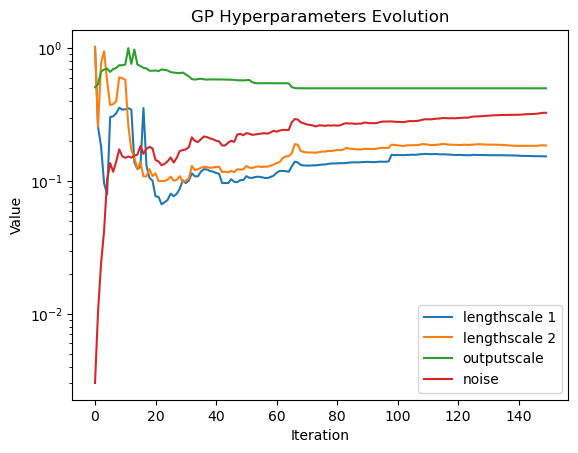

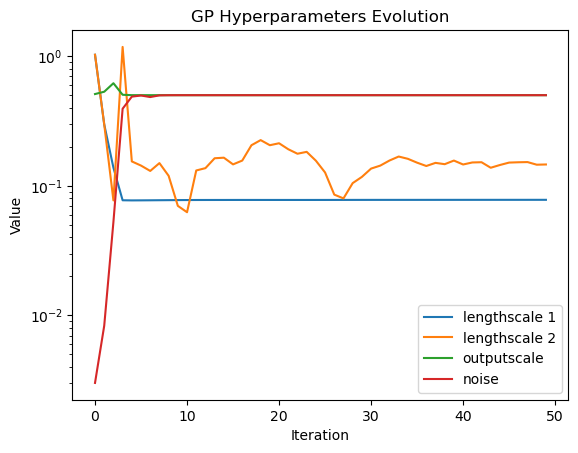

In [17]:


plt.figure()
plt.plot(lengthscale[0], label='lengthscale 1')
plt.plot(lengthscale[1], label='lengthscale 2') 
plt.plot(outputscale, label='outputscale')
plt.plot(noise, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()

plt.figure()
plt.plot(lengthscale1[0], label='lengthscale 1')
plt.plot(lengthscale1[1], label='lengthscale 2') 
plt.plot(outputscale1, label='outputscale')
plt.plot(noise1, label='noise')
plt.legend()
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('GP Hyperparameters Evolution')
plt.show()


In [24]:
print(*([3],[1]))

[3] [1]


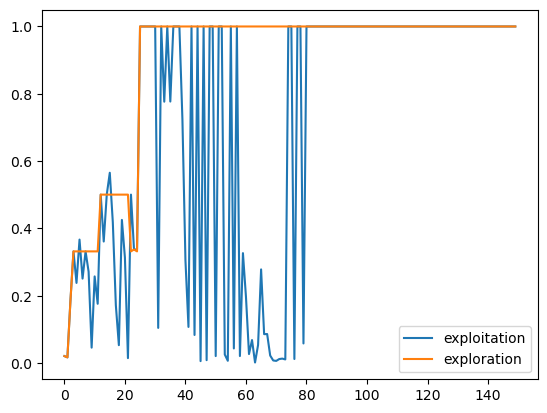

In [33]:
A = ([0],[1])
plt.plot(pp.exploitation(*A), label='exploitation')
plt.plot(pp.exploration(*A), label='exploration')
plt.legend()
plt.show()


### exploration and exploitation performances

### duration

In [23]:
perf_iter1, perf_gp1, perf_hyp, perf_mean, perf_std = pp1.duration_metrics()
perf_iter2, perf_gp2, perf_hyp, perf_mean, perf_std = pp2.duration_metrics()
perf_iter3, perf_gp3, perf_hyp, perf_mean, perf_std = pp3.duration_metrics()
perf_iter4, perf_gp4, perf_hyp, perf_mean, perf_std = pp4.duration_metrics()
perf_iter5, perf_gp5, perf_hyp, perf_mean, perf_std = pp5.duration_metrics()
perf_iter6, perf_gp6, perf_hyp, perf_mean, perf_std = pp6.duration_metrics()
perf_iter7, perf_gp7, perf_hyp, perf_mean, perf_std = pp7.duration_metrics()
print(perf_iter1.shape)

(1000,)


In [24]:
print(perf_mean)

nan


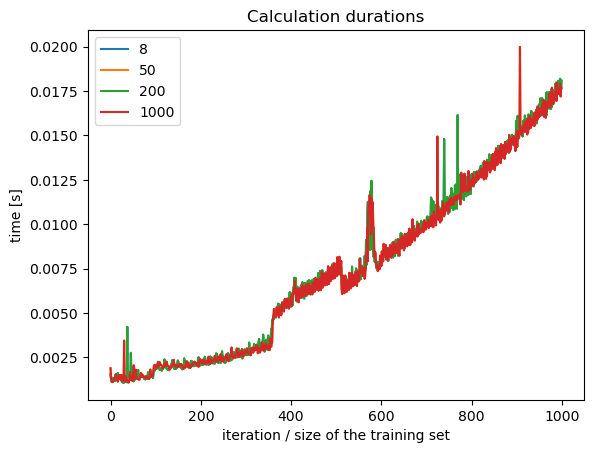

In [25]:
plt.plot(perf_iter1, label='8')
plt.plot(perf_iter2, label='50')
plt.plot(perf_iter1, label='200')
plt.plot(perf_iter2, label='1000')

plt.legend()
plt.title("Calculation durations")
plt.xlabel("iteration / size of the training set")
plt.ylabel("time [s]")
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1.e-3, 1)
plt.show()

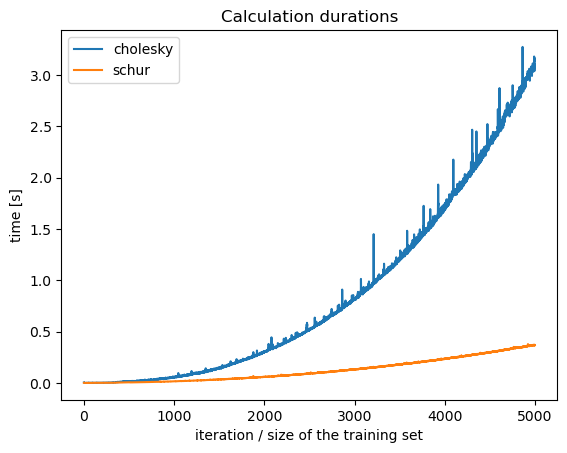

In [26]:
plt.plot(perf_iter7, label='cholesky')
plt.plot(perf_iter4, label='schur')

plt.legend()
plt.title("Calculation durations")
plt.xlabel("iteration / size of the training set")
plt.ylabel("time [s]")
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1.e-3, 1)
plt.show()

Whith CHOLESKY : 
Calculated exponent (p): 2.50
Coefficient (alpha): 1.65e-09
Whith SCHUR : 
Calculated exponent (p): 1.95
Coefficient (alpha): 2.24e-08


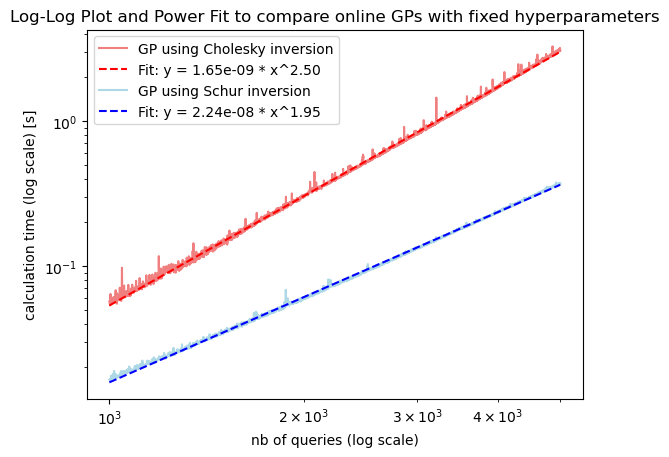

In [27]:

x=np.arange(5000)


# Convert to log scale to fit a line and determine p
log_x = np.log(x[1000:])
log_y = np.log(perf_iter7[1000:])

# Perform linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Display the result for the slope, which corresponds to the power p
print("Whith CHOLESKY : ")
print(f"Calculated exponent (p): {slope:.2f}")
print(f"Coefficient (alpha): {np.exp(intercept):.2e}")

# Plot the log-log graph
plt.loglog(x[1000:], perf_iter7[1000:], label='GP using Cholesky inversion', color='lightcoral')
plt.loglog(x[1000:], np.exp(intercept) * x[1000:]**slope, '--', label=f'Fit: y = {np.exp(intercept):.2e} * x^{slope:.2f}', color='red')


# Convert to log scale to fit a line and determine p
log_x = np.log(x[1000:])
log_y = np.log(perf_iter4[1000:])

# Perform linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Display the result for the slope, which corresponds to the power p
print("Whith SCHUR : ")
print(f"Calculated exponent (p): {slope:.2f}")
print(f"Coefficient (alpha): {np.exp(intercept):.2e}")

# Plot the log-log graph
plt.loglog(x[1000:], perf_iter4[1000:], label='GP using Schur inversion', color='lightblue')
plt.loglog(x[1000:], np.exp(intercept) * x[1000:]**slope, '--', label=f'Fit: y = {np.exp(intercept):.2e} * x^{slope:.2f}', color='blue')



# Add labels and legend
plt.xlabel('nb of queries (log scale)')
plt.ylabel('calculation time (log scale) [s]')
plt.title('Log-Log Plot and Power Fit to compare online GPs with fixed hyperparameters')
plt.legend()
plt.show()

Whith SCHUR : 
Calculated exponent (p): 1.95
Coefficient (alpha): 2.24e-08


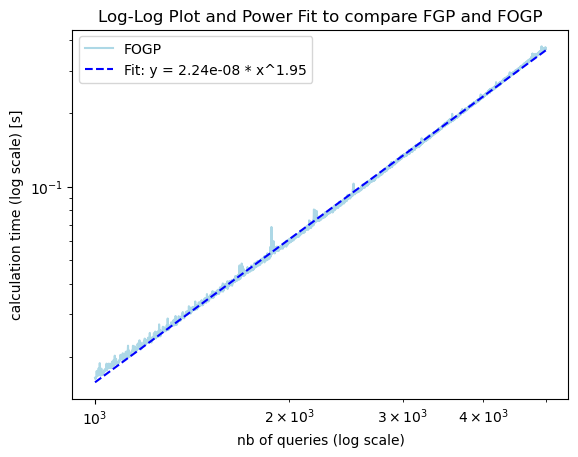

In [28]:

x=np.arange(5000)


# # Convert to log scale to fit a line and determine p
# log_x = np.log(x[500:])
# log_y = np.log(perf_iter5[500:])

# # Perform linear regression on the log-log data
# slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# # Display the result for the slope, which corresponds to the power p
# print("Whith CHOLESKY : ")
# print(f"Calculated exponent (p): {slope:.2f}")
# print(f"Coefficient (alpha): {np.exp(intercept):.2e}")

# # Plot the log-log graph
# plt.loglog(x[500:], perf_iter5[500:], label='FGP', color='lightcoral')
# plt.loglog(x[500:], np.exp(intercept) * x[500:]**slope, '--', label=f'Fit: y = {np.exp(intercept):.2e} * x^{slope:.2f}', color='red')


# Convert to log scale to fit a line and determine p
log_x = np.log(x[1000:])
log_y = np.log(perf_iter4[1000:])

# Perform linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Display the result for the slope, which corresponds to the power p
print("Whith SCHUR : ")
print(f"Calculated exponent (p): {slope:.2f}")
print(f"Coefficient (alpha): {np.exp(intercept):.2e}")

# Plot the log-log graph
plt.loglog(x[1000:], perf_iter4[1000:], label='FOGP', color='lightblue')
plt.loglog(x[1000:], np.exp(intercept) * x[1000:]**slope, '--', label=f'Fit: y = {np.exp(intercept):.2e} * x^{slope:.2f}', color='blue')



# Add labels and legend
plt.xlabel('nb of queries (log scale)')
plt.ylabel('calculation time (log scale) [s]')
plt.title('Log-Log Plot and Power Fit to compare FGP and FOGP')
plt.legend()
plt.show()